<a href="https://colab.research.google.com/github/adeliiee22/edelweiss/blob/Data/Google_Apps_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Import Data

In [ ]:
# membuat akses ke google drive untuk load data

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# load data dan simpan sebagai dataframe df

import pandas as pd

# df = pd.read_csv("/content/drive/MyDrive/googleplaystore.csv")
df = pd.read_csv("/content/googleplaystore.csv")

df.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
df_temp = df [["Category", "Rating"]]

In [ ]:
one_hot_encoded_data = pd.get_dummies(df_temp, columns =['Category'])

In [ ]:
one_hot_encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Rating                        9367 non-null   float64
 1   Category_1.9                  10841 non-null  uint8  
 2   Category_ART_AND_DESIGN       10841 non-null  uint8  
 3   Category_AUTO_AND_VEHICLES    10841 non-null  uint8  
 4   Category_BEAUTY               10841 non-null  uint8  
 5   Category_BOOKS_AND_REFERENCE  10841 non-null  uint8  
 6   Category_BUSINESS             10841 non-null  uint8  
 7   Category_COMICS               10841 non-null  uint8  
 8   Category_COMMUNICATION        10841 non-null  uint8  
 9   Category_DATING               10841 non-null  uint8  
 10  Category_EDUCATION            10841 non-null  uint8  
 11  Category_ENTERTAINMENT        10841 non-null  uint8  
 12  Category_EVENTS               10841 non-null  uint8  
 13  C

## Data Cleaning

In [ ]:
df.shape

(10841, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

##EDA

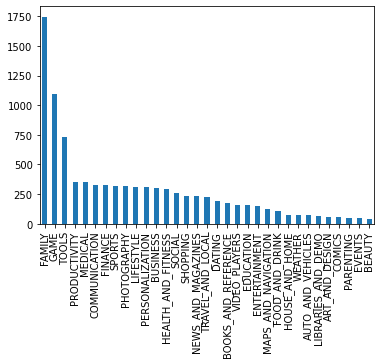

In [ ]:
df['Category'].value_counts().plot.bar()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8ebec699d0>]],
      dtype=object)

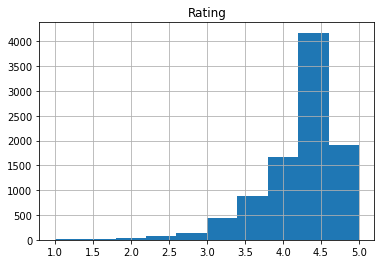

In [ ]:
df.hist(column='Rating', bins=10)

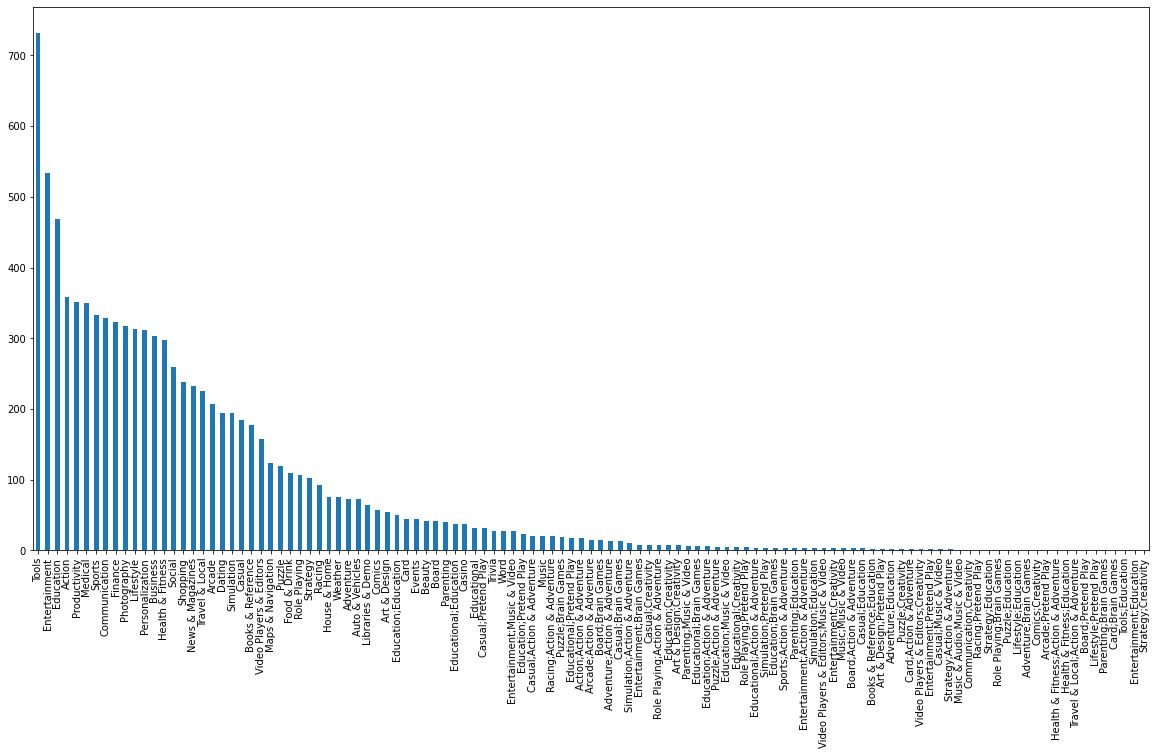

In [ ]:
df['Genres'].value_counts().plot.bar(figsize=(20,10))

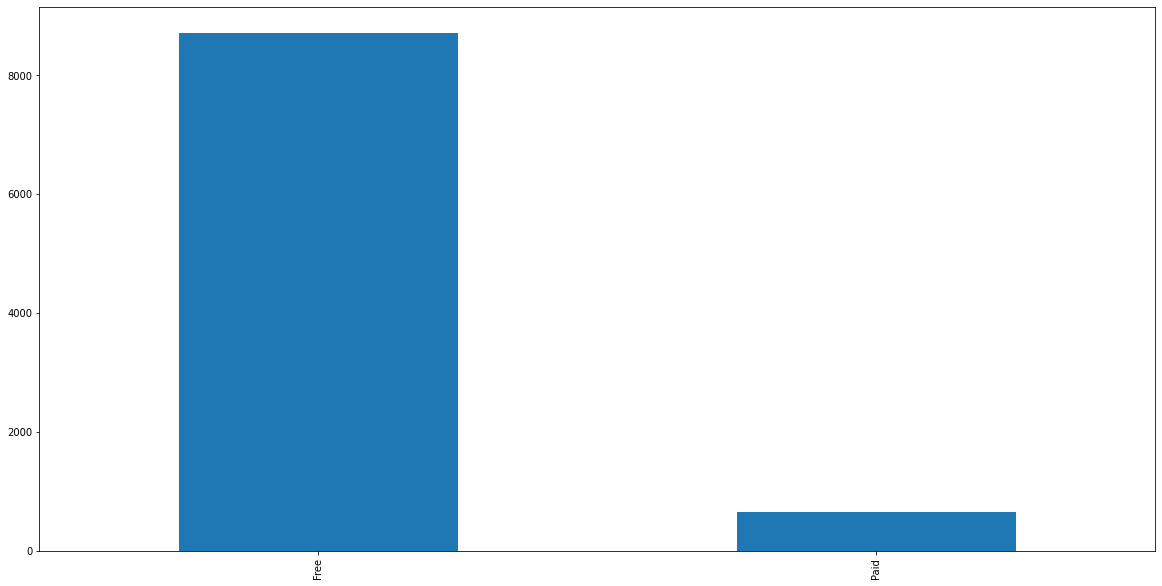

In [ ]:
df['Type'].value_counts().plot.bar(figsize=(20,10))

In [ ]:
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

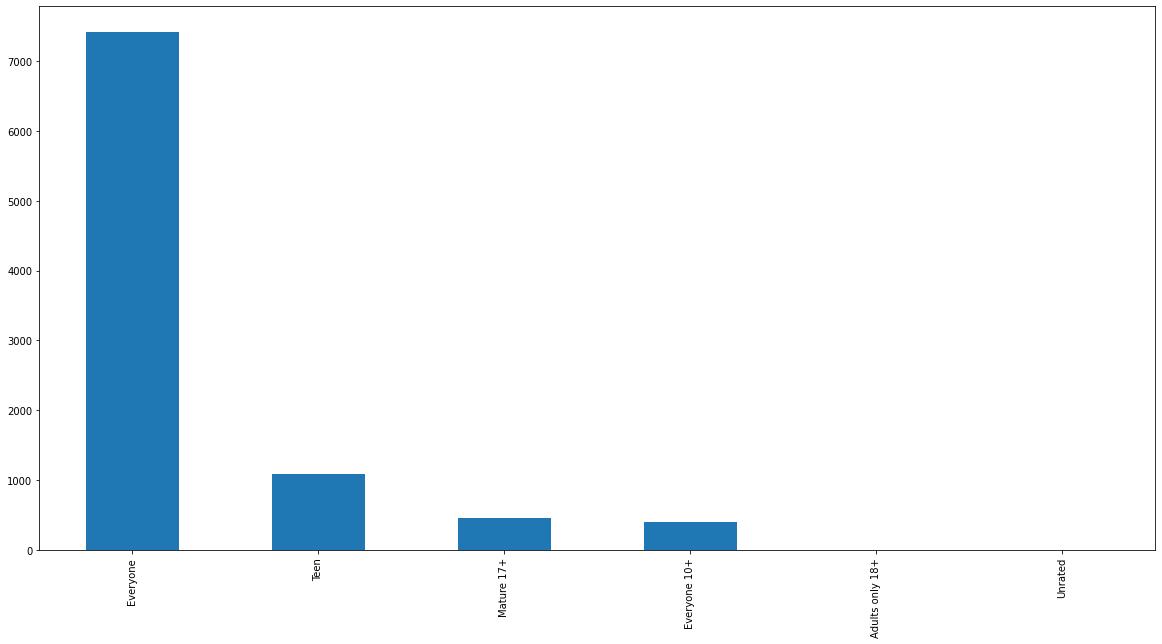

In [ ]:
df['Content Rating'].value_counts().plot.bar(figsize=(20,10))

##Feature Engineering

In [ ]:
genderEncoding = pd.get_dummies(df['Category'])

df_encoded = df.join(genderEncoding)
df_encoded.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,PERSONALIZATION,PHOTOGRAPHY,PRODUCTIVITY,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,...,0,0,0,0,0,0,0,0,0,0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,...,0,0,0,0,0,0,0,0,0,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,...,0,0,0,0,0,0,0,0,0,0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,...,0,0,0,0,0,0,0,0,0,0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
Content_Rating = {'Content Rating': {"Everyone": 0, "Teen": 1, "Mature 17+":2, "Everyone 10+": 3, "Adults only 18+":4, "Unrated" : 5}}
Type = {'Type': {'Free': 0, 'Paid': 1}}

df_encoded = df_encoded.replace(Content_Rating)
df_encoded = df_encoded.replace(Type)
df_encoded.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,PERSONALIZATION,PHOTOGRAPHY,PRODUCTIVITY,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",0,0,0,Art & Design,...,0,0,0,0,0,0,0,0,0,0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",0,0,0,Art & Design;Pretend Play,...,0,0,0,0,0,0,0,0,0,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",0,0,0,Art & Design,...,0,0,0,0,0,0,0,0,0,0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",0,0,1,Art & Design,...,0,0,0,0,0,0,0,0,0,0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",0,0,0,Art & Design;Creativity,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_encoded.drop(columns=['App','Size','Installs','Genres','Last Updated'],inplace=True)

In [ ]:
df_encoded.head()

,Category,Rating,Reviews,Type,Price,Content Rating,Current Ver,Android Ver,ART_AND_DESIGN,AUTO_AND_VEHICLES,...,PERSONALIZATION,PHOTOGRAPHY,PRODUCTIVITY,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER
0,ART_AND_DESIGN,4.1,159,0,0,0,1.0.0,4.0.3 and up,1,0,...,0,0,0,0,0,0,0,0,0,0
1,ART_AND_DESIGN,3.9,967,0,0,0,2.0.0,4.0.3 and up,1,0,...,0,0,0,0,0,0,0,0,0,0
2,ART_AND_DESIGN,4.7,87510,0,0,0,1.2.4,4.0.3 and up,1,0,...,0,0,0,0,0,0,0,0,0,0
3,ART_AND_DESIGN,4.5,215644,0,0,1,Varies with device,4.2 and up,1,0,...,0,0,0,0,0,0,0,0,0,0
4,ART_AND_DESIGN,4.3,967,0,0,0,1.1,4.4 and up,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_encoded.drop(columns=['Current Ver','Android Ver'],inplace=True)

In [ ]:
df_encoded.head()

,Category,Rating,Reviews,Type,Price,Content Rating,ART_AND_DESIGN,AUTO_AND_VEHICLES,BEAUTY,BOOKS_AND_REFERENCE,...,PERSONALIZATION,PHOTOGRAPHY,PRODUCTIVITY,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER
0,ART_AND_DESIGN,4.1,159,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ART_AND_DESIGN,3.9,967,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ART_AND_DESIGN,4.7,87510,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ART_AND_DESIGN,4.5,215644,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ART_AND_DESIGN,4.3,967,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_encoded.corr()

,Rating,Type,Content Rating,ART_AND_DESIGN,AUTO_AND_VEHICLES,BEAUTY,BOOKS_AND_REFERENCE,BUSINESS,COMICS,COMMUNICATION,...,PERSONALIZATION,PHOTOGRAPHY,PRODUCTIVITY,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER
Rating,1.000000,0.039592,0.016473,0.029114,-0.000245,0.011302,0.041678,-0.024987,-0.005619,-0.012317,...,0.051689,0.000100,0.007493,0.021264,0.020876,0.011547,-0.081825,-0.025201,-0.032784,0.009099
Type,0.039592,1.000000,-0.023987,-0.006309,-0.019325,-0.018265,-0.013174,-0.023545,-0.021482,-0.001382,...,0.104561,-0.008964,-0.013737,-0.038584,-0.040751,0.000041,0.019607,-0.020811,-0.022861,0.008666
Content Rating,0.016473,-0.023987,1.000000,-0.025958,-0.033467,-0.021791,-0.020587,-0.078995,0.053575,-0.053675,...,-0.037473,-0.067099,-0.083508,-0.024612,0.132114,-0.010427,-0.124682,-0.064279,-0.022576,-0.029396
ART_AND_DESIGN,0.029114,-0.006309,-0.025958,1.000000,-0.007181,-0.005438,-0.011277,-0.014814,-0.006395,-0.015434,...,-0.015040,-0.015164,-0.015987,-0.013082,-0.013663,-0.015214,-0.023609,-0.012740,-0.010681,-0.007279
AUTO_AND_VEHICLES,-0.000245,-0.019325,-0.033467,-0.007181,1.000000,-0.005952,-0.012344,-0.016216,-0.007001,-0.016895,...,-0.016464,-0.016600,-0.017500,-0.014321,-0.014956,-0.016654,-0.025843,-0.013946,-0.011692,-0.007968
BEAUTY,0.011302,-0.018265,-0.021791,-0.005438,-0.005952,1.000000,-0.009348,-0.012280,-0.005301,-0.012794,...,-0.012467,-0.012570,-0.013252,-0.010844,-0.011326,-0.012611,-0.019570,-0.010561,-0.008854,-0.006034
BOOKS_AND_REFERENCE,0.041678,-0.013174,-0.020587,-0.011277,-0.012344,-0.009348,1.000000,-0.025467,-0.010994,-0.026533,...,-0.025855,-0.026068,-0.027483,-0.022490,-0.023488,-0.026153,-0.040585,-0.021901,-0.018361,-0.012514
BUSINESS,-0.024987,-0.023545,-0.078995,-0.014814,-0.016216,-0.012280,-0.025467,1.000000,-0.014443,-0.034856,...,-0.033965,-0.034245,-0.036103,-0.029544,-0.030856,-0.034357,-0.053315,-0.028771,-0.024121,-0.016439
COMICS,-0.005619,-0.021482,0.053575,-0.006395,-0.007001,-0.005301,-0.010994,-0.014443,1.000000,-0.015048,...,-0.014663,-0.014784,-0.015586,-0.012755,-0.013321,-0.014832,-0.023017,-0.012421,-0.010413,-0.007097
COMMUNICATION,-0.012317,-0.001382,-0.053675,-0.015434,-0.016895,-0.012794,-0.026533,-0.034856,-0.015048,1.000000,...,-0.035387,-0.035679,-0.037615,-0.030781,-0.032148,-0.035796,-0.055548,-0.029976,-0.025131,-0.017127


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


Text(0.5, 1.0, 'Correlation Heatmap')

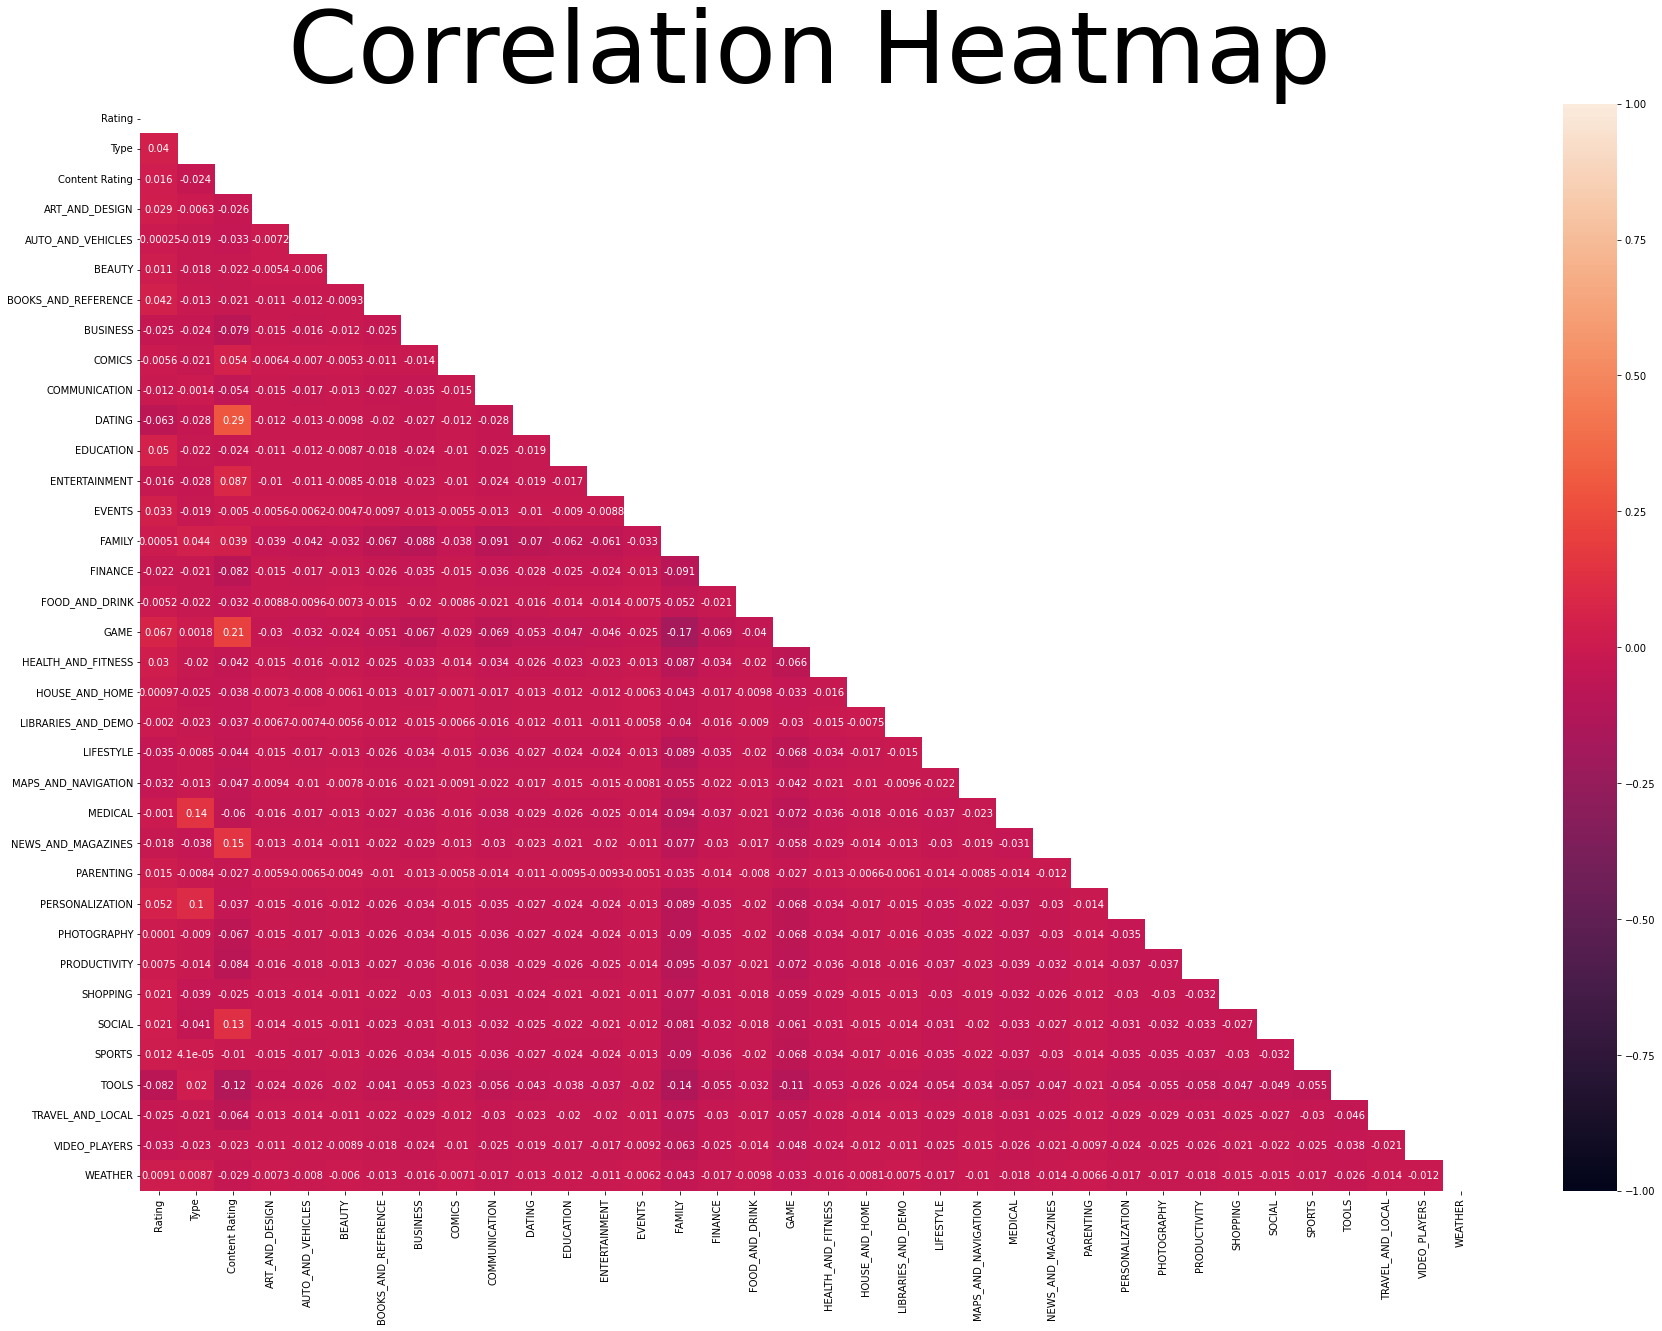

In [ ]:
# mengimpor pyplot dari matplotlib untuk membantu kita membuat plot
import matplotlib.pyplot as plt
# pip install seaborn 
import seaborn as sns
import numpy as np
# menentukan ukuran plot
plt.figure(figsize=(30, 20))
mask = np.triu(np.ones_like(df_encoded.corr(), dtype=np.bool))
# membuat korelasi heatmap
heatmap = sns.heatmap(df_encoded.corr(), vmin=-1, vmax=1, annot = True, mask = mask)
# menentukan format plot (judul, ukuran text)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':100}, pad=10)


**Dari heatmap kita dapat melihat.... Content Rating dan Aplikasi Dating memiliki nilai korelasi yang tinggi yaitu 0,29! Ini artinya semakin tinggi nilai content rating maka kemungkinan aplikasi tersebut adalah aplikasi dating 🥰**

In [ ]:
# sekarang kita coba lihat persebaran data antara keduanya
df_temp = df[df['Category']=='DATING']
df_temp = df_temp[['Reviews', 'Rating']]

In [ ]:
df_temp.head()

,Reviews,Rating
476,1545,4.2
477,57,2.6
481,2,3.5
482,516801,4.0
483,285726,4.1


Text(0.5, 1.0, 'Reviews and Rating Dating Apps')

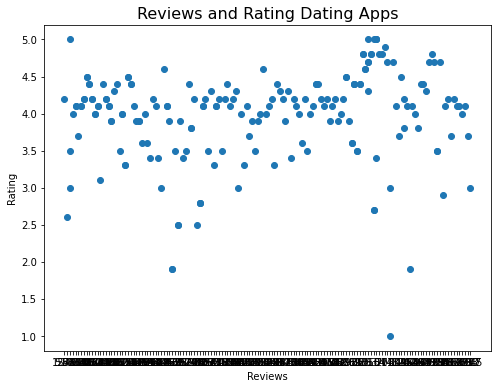

In [ ]:
# sekarang kita coba lihat persebaran data antara keduanya
plt.figure(figsize=(8, 6))
plt.scatter(df_temp['Reviews'], df_temp['Rating'])
plt.xlabel("Reviews")
plt.ylabel("Rating")
plt.title("Reviews and Rating Dating Apps", size=16)

In [ ]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [ ]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


###Price

In [ ]:
df[df.columns[7]] = df[df.columns[7]].replace('[\$,]', '', regex=True).astype(float)

In [ ]:
df_paid = df[df['Type'] == 'Paid'] #df['Type'] or df.columns[7] its the same. df['Type', 'Price'], alter df.columna[7:8]
df_paid.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,"100,000+",Paid,4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,"100,000+",Paid,4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
290,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,"100,000+",Paid,4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
291,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,"100,000+",Paid,4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,Varies with device,"100,000+",Paid,3.99,Everyone,Communication,"July 5, 2018",7.5.3.20547,4.1 and up


In [ ]:
df_paid.describe()

,Rating,Price
count,645.000000,645.000000
mean,4.266822,13.949721
std,0.548247,58.791144
min,1.000000,0.990000
25%,4.100000,1.990000
50%,4.400000,2.990000
75%,4.600000,4.990000
max,5.000000,400.000000


**Rata-rata harga aplikasi pada Google Play store adalah $13.9 namun ada outlier aplikasi dengan harga 400 dolar**

In [ ]:
df_paid[df_paid['Price'] > 300].sort_values(by=['Price'], ascending=False)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3M,"10,000+",Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
4197,most expensive app (H),FAMILY,4.3,6,1.5M,100+,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26M,"10,000+",Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
5351,I am rich,LIFESTYLE,3.8,3547,1.8M,"100,000+",Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8.7M,"10,000+",Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4.7M,"50,000+",Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22M,"1,000+",Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965k,"5,000+",Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up
5362,I Am Rich Pro,FAMILY,4.4,201,2.7M,"5,000+",Paid,399.99,Everyone,Entertainment,"May 30, 2017",1.54,1.6 and up
5364,I am rich (Most expensive app),FINANCE,4.1,129,2.7M,"1,000+",Paid,399.99,Teen,Finance,"December 6, 2017",2,4.0.3 and up


**Aplikasi yang melampaui rata-rata harga berbayar atipikal berkutat pada finansial dengan judul "I am Rich"**

Text(0.5, 1.0, 'Rating and Price')

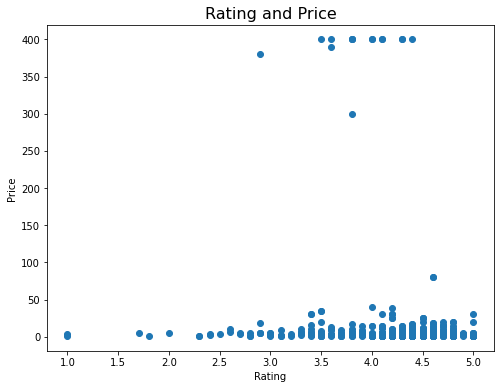

In [ ]:
# sekarang kita coba lihat persebaran data antara keduanya
plt.figure(figsize=(8, 6))
plt.scatter(df_paid['Rating'], df_paid['Price'])
plt.xlabel("Rating")
plt.ylabel("Price")
plt.title("Rating and Price", size=16)

**Dari scatter plot, dapat dilihat bahwa harga tidak mempengaruhi rating aplikasi namun jika harga sangat mahal maka dia dapat mendapatkan rating yang rendah.** 📉

###Installs

In [ ]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '100+', '500+', '10+',
       '5+', '50+', '1+'], dtype=object)

In [ ]:
df_install = df.copy()

In [ ]:
df_install.Installs = df_install.Installs.apply(lambda x: x.replace(',',''))
df_install.Installs = df_install.Installs.apply(lambda x: x.replace('+',''))
df_install.Installs = df_install.Installs.apply(lambda x: int(x))

In [ ]:
df_install.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
Sorted_value = sorted(list(df_install['Installs'].unique()))

In [ ]:
df_install['Installs'].replace(Sorted_value,range(0,len(Sorted_value),1), inplace = True )

In [ ]:
df_install['Installs'].head()

0     8
1    11
2    13
3    15
4    10
Name: Installs, dtype: int64

Text(0.5, 1.0, 'Rating VS Installs')

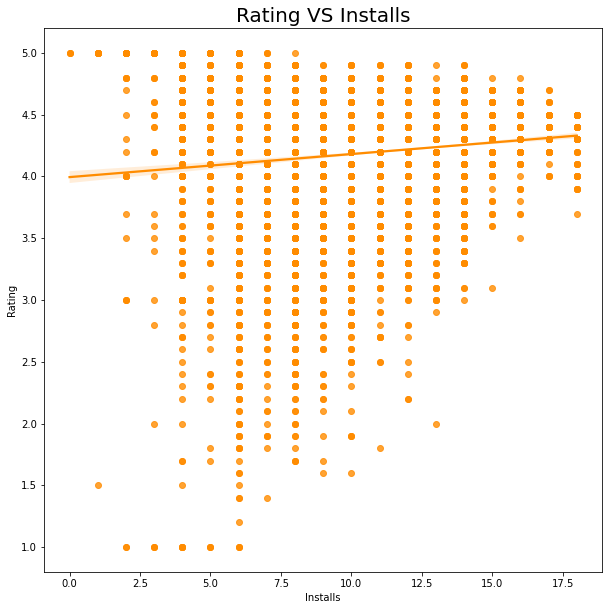

In [ ]:
plt.figure(figsize = (10,10))
sns.regplot(x="Installs", y="Rating", color = 'darkorange',data=df_install);
plt.title('Rating VS Installs',size = 20)

**Ada hubungan antara jumlah install dengan rating**

## Feature Engineering

In [ ]:
# import libraries yang dibutuhkan
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
# memilih kolom untuk digunakan sebagai fitur model -- menghilangkan target variabel dan kolom tidak penting lainnya
x = df_encoded.drop(columns=['Rating'])
# memilih kolom untuk digunakan sebagai variabel target
y = df_encoded['Rating']

# membagi data ke training dan testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

print("X_train : ", x_train.shape)
print("X_test : ", x_test.shape)
print("Y_train : ", y_train.shape)
print("Y_test : ", y_test.shape)

X_train :  (7488, 38)
X_test :  (1872, 38)
Y_train :  (7488,)
Y_test :  (1872,)


In [ ]:
df_encoded.head()

,Category,Rating,Reviews,Type,Price,Content Rating,ART_AND_DESIGN,AUTO_AND_VEHICLES,BEAUTY,BOOKS_AND_REFERENCE,...,PERSONALIZATION,PHOTOGRAPHY,PRODUCTIVITY,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER
0,ART_AND_DESIGN,4.1,159,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ART_AND_DESIGN,3.9,967,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ART_AND_DESIGN,4.7,87510,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ART_AND_DESIGN,4.5,215644,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ART_AND_DESIGN,4.3,967,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_encoded.drop(columns=['Category'], inplace= True)

In [ ]:
x_train.head()

,Category,Reviews,Type,Price,Content Rating,ART_AND_DESIGN,AUTO_AND_VEHICLES,BEAUTY,BOOKS_AND_REFERENCE,BUSINESS,...,PERSONALIZATION,PHOTOGRAPHY,PRODUCTIVITY,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER
285,BUSINESS,80804,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
523,DATING,1972,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
354,COMMUNICATION,437674,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9621,BOOKS_AND_REFERENCE,454412,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3494,PRODUCTIVITY,41418,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
df_encoded['Harga'] = df_paid['Price']

In [ ]:
df_encoded

,Rating,Reviews,Type,Price,Content Rating,ART_AND_DESIGN,AUTO_AND_VEHICLES,BEAUTY,BOOKS_AND_REFERENCE,BUSINESS,...,PHOTOGRAPHY,PRODUCTIVITY,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER,Harga
0,4.1,159,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
1,3.9,967,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
2,4.7,87510,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
3,4.5,215644,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
4,4.3,967,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,4.0,7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
10836,4.5,38,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
10837,5.0,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
10839,4.5,114,0,0,2,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,NaN


In [ ]:
df_encoded.fillna(value= 0, inplace = True)

In [ ]:
df_encoded.drop(columns = 'Price', inplace = True)

In [ ]:
# membuat model linear regression
linear_regression_model = LinearRegression()
# "training" model dengan dataset yang sesuai
linear_regression_model.fit(x_train,y_train)

ValueError: ignored